In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [2]:
img=cv2.imread(r"C:\Users\sumit\Desktop\Code\Project\Image classification\Model\test_image\57.png")
img.shape

(1024, 1024, 3)

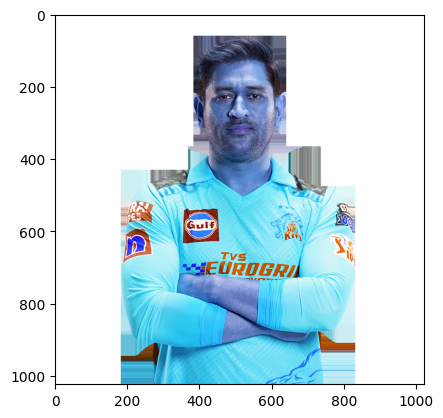

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 1024)

In [5]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

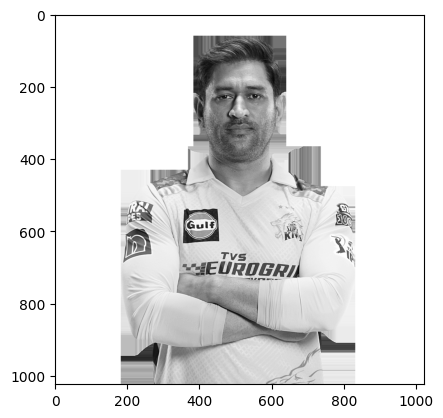

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade=cv2.CascadeClassifier(r"C:\Users\sumit\Desktop\Code\Project\Image classification\Model\opencv\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier(r"C:\Users\sumit\Desktop\Code\Project\Image classification\Model\opencv\haarcascades\haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[387, 132, 252, 252]])

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(387, 132, 252, 252)

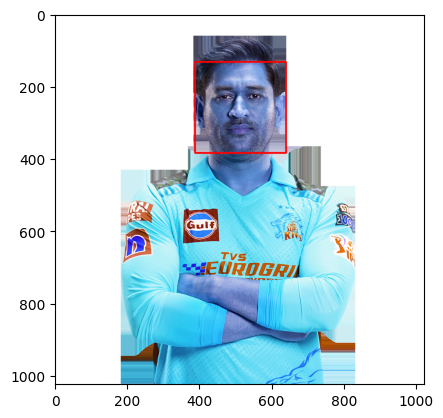

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(face_img)

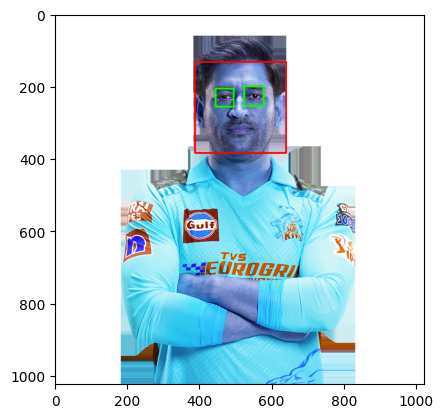

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

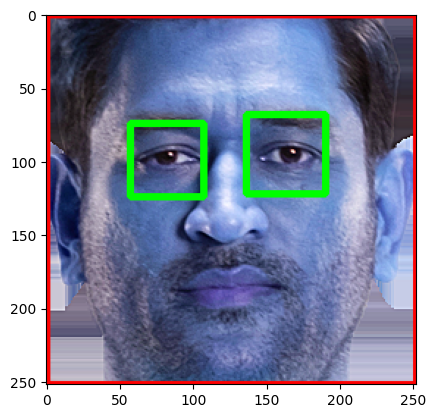

In [11]:
plt.imshow(roi_color,cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

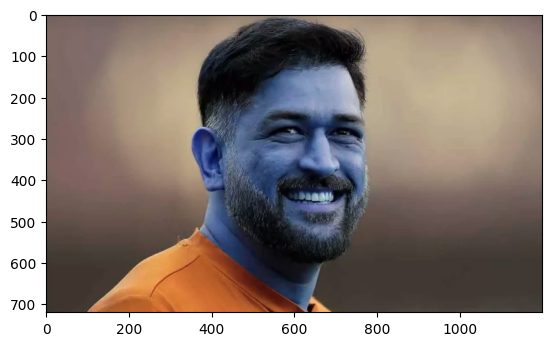

In [13]:
original_image = cv2.imread(r'C:\Users\sumit\Desktop\Code\Project\Image classification\Model\test_image\1435686-ms-dhoni-1200x720.webp')
plt.imshow(original_image)

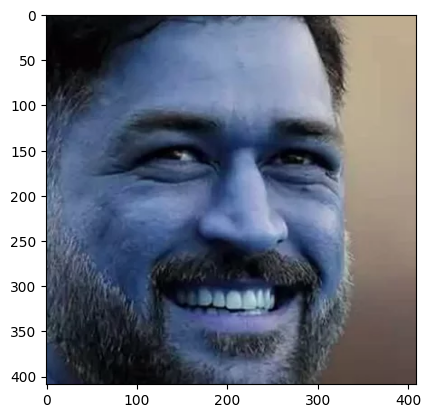

In [14]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Users\sumit\Desktop\Code\Project\Image classification\Model\test_image\1435686-ms-dhoni-1200x720.webp')
plt.imshow(cropped_image)

In [16]:
path_to_data = "./Photos/"
path_to_cr_data = "./Photos/cropped/"

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./Photos/cropped',
 './Photos/ms_dhoni',
 './Photos/rohit_sharma',
 './Photos/sachin_tendulkar',
 './Photos/virat_kohli']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            
            # Check if the image is not empty
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder:", cropped_folder)

                cropped_file_name = f"{celebrity_name}_{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

        except Exception as e:
            print(f"Error processing image {entry.path}: {e}")

Generating cropped images in folder: ./Photos/cropped/ms_dhoni
Generating cropped images in folder: ./Photos/cropped/rohit_sharma
Generating cropped images in folder: ./Photos/cropped/sachin_tendulkar
Error processing image ./Photos/virat_kohli\08vk.gif: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Generating cropped images in folder: ./Photos/cropped/virat_kohli
Error processing image ./Photos/virat_kohli\1678836965_57c7769197215ff88fbbb4b52c34856d.gif: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Error processing image ./Photos/virat_kohli\1705967551_kohli.gif: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [21]:
print(cropped_image_dirs)
print(celebrity_file_names_dict)

['./Photos/cropped/ms_dhoni', './Photos/cropped/rohit_sharma', './Photos/cropped/sachin_tendulkar', './Photos/cropped/virat_kohli']
{'cropped': [], 'ms_dhoni': ['./Photos/cropped/ms_dhoni\\ms_dhoni_1.png', './Photos/cropped/ms_dhoni\\ms_dhoni_2.png', './Photos/cropped/ms_dhoni\\ms_dhoni_3.png', './Photos/cropped/ms_dhoni\\ms_dhoni_4.png', './Photos/cropped/ms_dhoni\\ms_dhoni_5.png', './Photos/cropped/ms_dhoni\\ms_dhoni_6.png', './Photos/cropped/ms_dhoni\\ms_dhoni_7.png', './Photos/cropped/ms_dhoni\\ms_dhoni_8.png', './Photos/cropped/ms_dhoni\\ms_dhoni_9.png', './Photos/cropped/ms_dhoni\\ms_dhoni_10.png', './Photos/cropped/ms_dhoni\\ms_dhoni_11.png', './Photos/cropped/ms_dhoni\\ms_dhoni_12.png', './Photos/cropped/ms_dhoni\\ms_dhoni_13.png', './Photos/cropped/ms_dhoni\\ms_dhoni_14.png', './Photos/cropped/ms_dhoni\\ms_dhoni_15.png', './Photos/cropped/ms_dhoni\\ms_dhoni_16.png', './Photos/cropped/ms_dhoni\\ms_dhoni_17.png', './Photos/cropped/ms_dhoni\\ms_dhoni_18.png', './Photos/cropped/ms

In [22]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

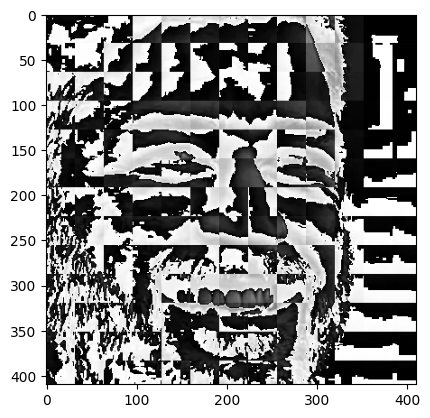

In [23]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [27]:
class_dict = {}
count = 0
first_iteration = True  # Flag to skip the first iteration
for celebrity_name in celebrity_file_names_dict.keys():
    if not first_iteration:
        class_dict[celebrity_name] = count
        count += 1
    else:
        first_iteration = False
class_dict

{'ms_dhoni': 0, 'rohit_sharma': 1, 'sachin_tendulkar': 2, 'virat_kohli': 3}

In [68]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [69]:
len(X)

61

In [70]:

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(61, 4096)

In [71]:
X[0]

array([ 62.,  52.,  34., ...,  59., 230., 255.])

In [72]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.375

In [75]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.25      1.00      0.40         1
           2       1.00      0.17      0.29         6
           3       0.57      0.80      0.67         5

    accuracy                           0.38        16
   macro avg       0.46      0.49      0.34        16
weighted avg       0.57      0.38      0.34        16



In [76]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [77]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [78]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


,model,best_score,best_params
0,svm,0.68,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.55,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.63,{'logisticregression__C': 1}


In [79]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [80]:
best_estimators['svm'].score(X_test,y_test)

0.5625

In [81]:
best_estimators['random_forest'].score(X_test,y_test)

0.4375

In [82]:
best_estimators['svm'].score(X_test,y_test)

0.5625

In [83]:
best_clf = best_estimators['svm']

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 2, 1],
       [0, 1, 0, 0],
       [3, 0, 3, 0],
       [0, 1, 0, 4]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

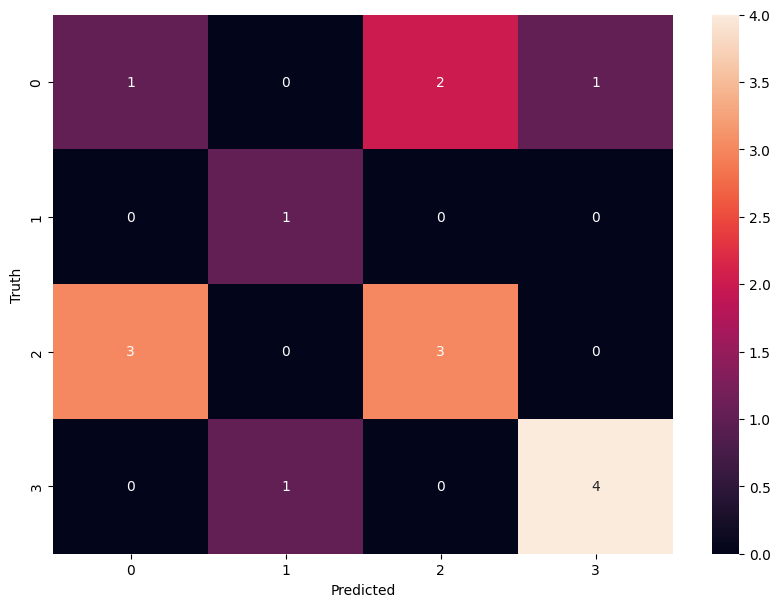

In [85]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
class_dict

{'ms_dhoni': 0, 'rohit_sharma': 1, 'sachin_tendulkar': 2, 'virat_kohli': 3}

In [87]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [67]:
import json 
with open("class_dictonary.json","w") as f:
    f.write(json.dumps(class_dict))